In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

In [21]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv')
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.columns = column_names

In [22]:
# Check for nulls and summary
print(df.isnull().sum())
print(df.describe())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
       sepal_length  sepal_width  petal_length  petal_width
count    149.000000   149.000000    149.000000   149.000000
mean       5.848322     3.051007      3.774497     1.205369
std        0.828594     0.433499      1.759651     0.761292
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [23]:
# Features and labels
X = df.drop('species', axis=1)
y = df['species']

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize

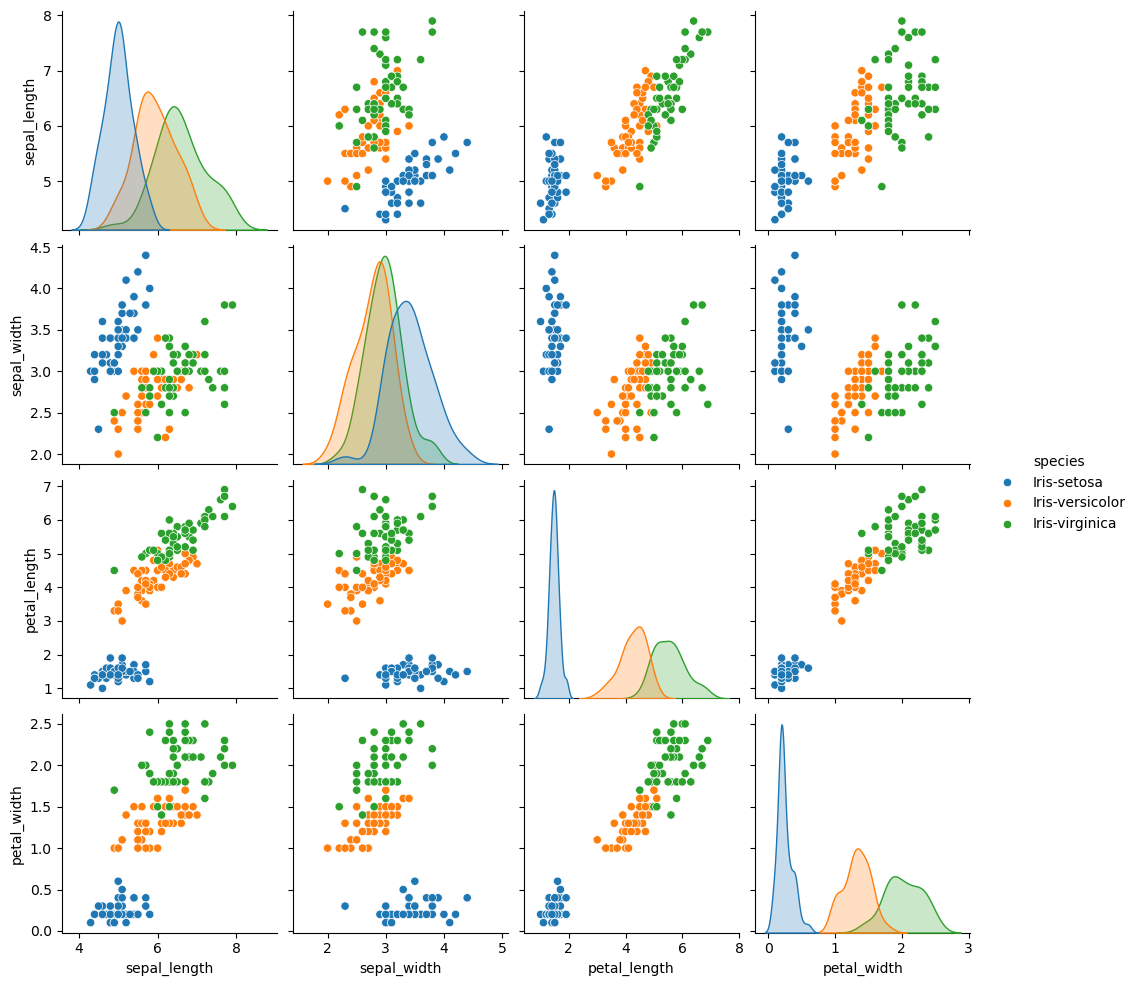

In [25]:

sns.pairplot(df, hue='species')
plt.show()

# --------- MODEL 1: Decision Tree ---------

In [26]:

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)

Decision Tree Accuracy: 0.9


# --------- MODEL 2: Perceptron ---------

In [27]:

perc_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perc_model.fit(X_train, y_train)
perc_pred = perc_model.predict(X_test)
perc_acc = accuracy_score(y_test, perc_pred)
print("Perceptron Accuracy:", perc_acc)

Perceptron Accuracy: 0.8


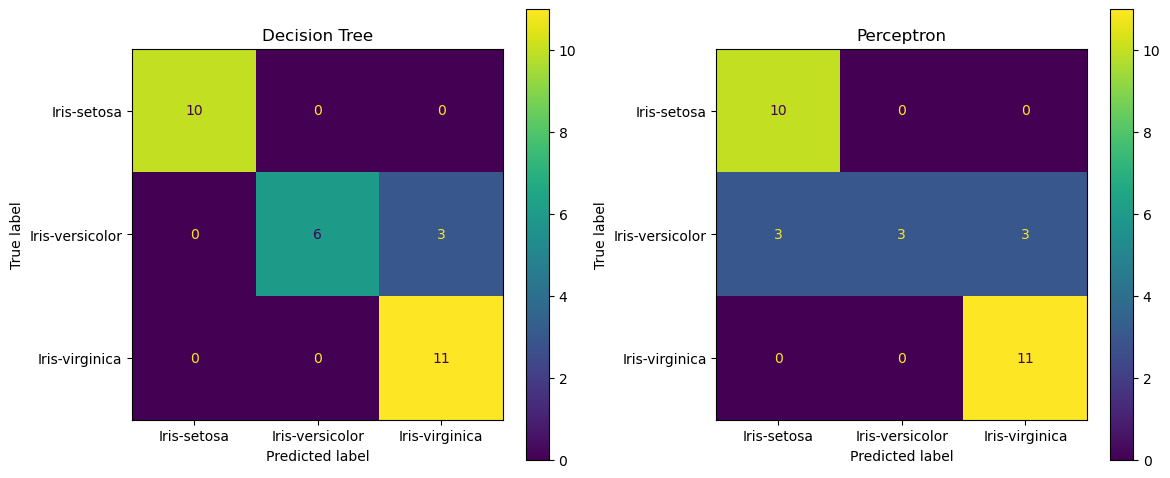

In [28]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, dt_pred, ax=axes[0])
axes[0].set_title("Decision Tree")

ConfusionMatrixDisplay.from_predictions(y_test, perc_pred, ax=axes[1])
axes[1].set_title("Perceptron")

plt.tight_layout()
plt.show()

In [29]:


# Save both models
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(perc_model, 'perceptron_model.pkl')

['perceptron_model.pkl']